<hr>

##### Make Money with Machine Learning
# Week 3 - Fraud Detection
<ins>Course Task Description:</ins><br>

1. Build a $Logistic$ $Regression$ model using $Scikit$-$Learn$ to predict fraudulent transactions using the $Kaggle$ $Dataset$.
2. Create at least one visualization of the data using the $Seaborn$ or an alternative librarya.
3. Submitted as a $Jupyter Notebook$ via Github.

<ins>Getting Started:</ins>
*   [IEEE CIS Fraud Detection Dataset](https://www.kaggle.com/c/ieee-fraud-detection/data)
*   [Data Blogger: Reference Tutorial](https://www.data-blogger.com/2017/06/15/fraud-detection-a-simple-machine-learning-approach/)

<ins>Credits and References:</ins><br>
*   [Kaggle: Fraud Detection Dataset](https://www.kaggle.com/c/ieee-fraud-detection/data)
*   [Leonardo's Kernel :](https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt)
*   [Towards Data Science: Will Koehrsen - Machine Learning Project Walk-Through (Part 1)](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)
*   [Github: Will Koehrsen - Notebook for Machine Learning Project Walk-Through](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb)<br>
*   [JiweiZh Visualisation ](https://github.com/JiweiZh/IEEE-CIS-Fraud-Detection/blob/master/Visualization.ipynb)
*   [bhattbhavesh91](https://github.com/bhattbhavesh91/GA_Sessions/blob/master/ga_dsmp_5jan2019/16_feature_selection.ipynb)
*   [Kaustuv Dash](https://medium.com/@gtavicecity581/ieee-fraud-detection-469398ce1ac4)

<ins>Useful references:</ins><br>

*  [Aurelion Geron: Hands-On Machine Learning with Scikit-Learn and Tensorflow](http://shop.oreilly.com/product/0636920052289.do)
*   [PyData: Pandas Referance](http://pandas.pydata.org/pandas-docs/stable/)
*   [Stackoverflow: Code to count Missing Values in DataFrames](https://stackoverflow.com/a/39734251)

## Reference:
[U.S. Counterfeit Credit Card Fraud Is Down 75%](https://www.fool.com/investing/2018/09/16/why-us-counterfeit-credit-card-fraud-is-down-75.aspx)
<p>A new study released by Visa Inc. (NYSE:V) shows that counterfeit credit card fraud dropped by as much as 75% from December 2015 to March 2018, thanks to the introduction of EMV chip-embedded credit cards. This is more proof that these chips are having the desired effect, and are working to curb fraudulent transactions at retailers' points of sale (POS). (Last year, counterfeit credit card fraud was down only 50% from 2015.)</p>

## **SETUP** Colab Working Directory

##**IMPORT** Dependencies
<ins>standard libraries</ins>

In [1]:
import pandas as pd
import numpy as np
import math

<ins>input/output libraries</ins>

In [2]:
import os
import glob
import pickle

plotting libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
%matplotlib inline

custom abbreviation

In [4]:
from pandas import DataFrame as pdf

<hr>

## <center>A FRAUD DETECTION MACHINE LEARNING MODEL</center>

### PREPARE datasets

load CSV files

In [6]:
!pwd

/Users/conroybrown/04_ML_Siraj/wk3/week3


In [7]:
d = {os.path.basename(f).split('.')[0]:pd.read_csv(f) for f in glob.glob('data/*.csv')}

### CREATE functions

FUNCTION to change *"object"* into *"category"* datatypes

In [8]:
def object_2_category(df):
    # Re-assign OBJECT datatypes as CATEGORICAL datatypes
    try:
        cols_cat = df.select_dtypes(include=['object']).columns
        df[cols_cat] = df[cols_cat].astype('category')
    except:
        print("No Object columns to reassign!")
    return df

FUNCTION to reduce the total amount of memory occupied by each dataset

In [9]:
def reduce_memory_size(df):
    # Downcast FLOAT64 columns
    try: 
        cols_f64 = df.select_dtypes(include=['float64']).columns
        df[cols_f64] = df[cols_f64].apply(pd.to_numeric, downcast='float')
    except:
        print("No Float64 columns to downcast!")
  
    # Downcast INTEGER columns
    try:
        cols_int = df.select_dtypes(include=['int']).columns
        df[cols_int] = df[cols_int].apply(pd.to_numeric, downcast='unsigned')
    except:
        print("No Integer columns to downcast!")
    return df   

FUNCTION to optimize dataframe datatypes and memory size

In [10]:
def optimize_dataframe(df):
    df = reduce_memory_size(df)
    return object_2_category(df)

FUNCTION to display missing values by column


FUNCTION to convert bytes into in larger units

In [12]:
def convert_size(size_bytes): 
    if size_bytes == 0: 
        return "0B" 
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB") 
    i = int(math.floor(math.log(size_bytes, 1024)))
    power = math.pow(1024, i) 
    size = round(size_bytes / power, 2) 
    return "{} {}".format(round(size), size_name[i])

FUNCTION to reduce the dataset memory size

In [13]:
def mem_size_reduce(df):
    old_size = df.memory_usage().sum()
    old_units = convert_size(old_size)
    df = optimize_dataframe(df)
    new_size = df.memory_usage().sum()
    new_units = convert_size(new_size)
    
    print(f'original memory usage: {old_units} => new memory usage: {new_units}')
    print(f'new memory usage is {round(100*new_size/old_size,1)}% of the original memory allocation')
    return df

In [14]:
def pickle_save(code_object, filename):
    pickle_out =open(f'pickle/{filename}', 'wb')
    pickle.dump(code_object, pickle_out)
    pickle_out.close()
    return print(f'{str(code_object)} was as "pickle/{str(filename)}"')

In [15]:
def pickle_load(filename):
    pickle_in =open(f'pickle/{filename}', 'rb')
    code_object = pickle.load(pickle_in)
    print(f'File "{str(filename)}" was load as {str(code_object)}')
    return code_object

<hr>

### OPTIMISE - memory usage
SUMMARY: reduce the amount of memory occupied by the datasets to improve overall computing performance.

REDUCE size of the training datasets

In [16]:
d['train_transaction'] = mem_size_reduce(d['train_transaction'])
d['train_identity'] = mem_size_reduce(d['train_identity'])

original memory usage: 2.0 GB => new memory usage: 861.0 MB
new memory usage is 48.5% of the original memory allocation
original memory usage: 45.0 MB => new memory usage: 16.0 MB
new memory usage is 35.6% of the original memory allocation


REDUCE size of the test datasets

In [17]:
d['test_transaction'] = mem_size_reduce(d['test_transaction'])
d['test_identity'] = mem_size_reduce(d['test_identity'])

original memory usage: 1.0 GB => new memory usage: 738.0 MB
new memory usage is 48.6% of the original memory allocation
original memory usage: 44.0 MB => new memory usage: 16.0 MB
new memory usage is 35.6% of the original memory allocation


REDUCE size of the remaining datasets

In [18]:
d['email_providers'] = mem_size_reduce(d['email_providers'])
d['sample_submission'] = mem_size_reduce(d['sample_submission'])

original memory usage: 3.0 KB => new memory usage: 6.0 KB
new memory usage is 171.6% of the original memory allocation
No Object columns to reassign!
original memory usage: 8.0 MB => new memory usage: 4.0 MB
new memory usage is 50.0% of the original memory allocation


CONCATENATE training and test datasets

In [19]:
train_data = pd.merge(d['train_transaction'], d['train_identity'], on='TransactionID', how='left')
test_data = pd.merge(d['test_transaction'], d['test_identity'], on='TransactionID', how='left')

In [20]:
[train_data.shape, test_data.shape]

[(590540, 434), (506691, 433)]

EXTRACT other datasets

In [21]:
email_providers = d['email_providers']
sample_submission = d['sample_submission']

DELETE dictionary containing the original imported CSV datasets ('$d$'), _to free-up memory_.

In [22]:
pickle_save(d, 'fraud_dataset')
del d

{'test_transaction':         TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             3663549       18403224       31.950001         W  10409  111.0   
1             3663550       18403263       49.000000         W   4272  111.0   
2             3663551       18403310      171.000000         W   4476  574.0   
3             3663552       18403310      284.950012         W  10989  360.0   
4             3663553       18403317       67.949997         W  18018  452.0   
...               ...            ...             ...       ...    ...    ...   
506686        4170235       34214279       94.679001         C  13832  375.0   
506687        4170236       34214287       12.173000         C   3154  408.0   
506688        4170237       34214326       49.000000         W  16661  490.0   
506689        4170238       34214337      202.000000         W  16621  516.0   
506690        4170239       34214345       24.346001         C   5713  168.0   

        card3     

<hr>

## <center>DATA PREPROCESSING</center>

EXAMINE the training dataset header

In [23]:
train_data.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
test_data.head(3)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.950001,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DEFINE TARGET feature (_aka dependent variable_)

In [25]:
target_feature ='isFraud'

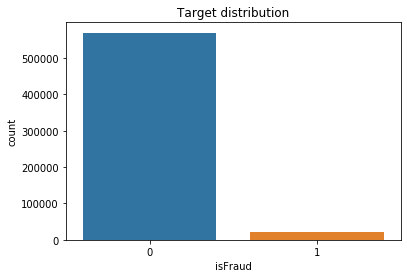

In [26]:
sns.countplot(train_data['isFraud']) #Imbalanced Dataset
plt.title('Target distribution');

DEFINE CATEGORICAL features

In [27]:
categorical_features = list(train_data.drop([target_feature], axis=1).select_dtypes(include=['category']).columns)
print(f'List of categorical features:\n\n{categorical_features}')

List of categorical features:

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


DEFINE NUMERICAL features

In [28]:
numerical_features = list(train_data.drop([target_feature], axis=1)._get_numeric_data().columns)
print(f'List of numerical features:\n\n{numerical_features}')

List of numerical features:

['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96'

STRIP or trim any leading and trailing whitespaces (just in case)

In [29]:
for i in categorical_features:
    try:
        train_data[i] = train_data[i].str.strip()
    except:
        print('str.strip() error!')

SUMMARIZE feature categories

In [30]:
print(f'Total number of features = {len(train_data.drop([target_feature], axis=1).columns)}')
      
print(('Total number of categorical features = '
       f'{len(categorical_features)} '  
       f'or {round((100*len(categorical_features)/len(train_data.drop([target_feature], axis=1).columns)),2)}'
       '% of total features'
    ))
      
print((f'Total number of numerical features = '
       f'{len(numerical_features)} ' 
       f'or {round((100*len(numerical_features)/len(train_data.drop([target_feature], axis=1).columns)),2)} '
       '% of total features'  
      ))

Total number of features = 433
Total number of categorical features = 31 or 7.16% of total features
Total number of numerical features = 402 or 92.84 % of total features


<hr>

## <center>BASELINE MODELS</center>

Create a machine learning model with minimal preprocessing, as a baseline to aid feature and hyper-parameter tuning optimization.

### IMPORT machine learning libraries

IMPORT Scikit-Learn library functions

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import itertools

### DEFINE functions

FUNCTION to mean and standard deviation across different features.

FUNCTION to impute datasets

In [33]:
def impute_n_reduce(X):
    numerical_features = X._get_numeric_data().columns.to_list()
    categorical_features = X.select_dtypes(include=['category']).columns.to_list()
    
    for i in numerical_features:
        X[i].fillna(X[i].mean(),inplace=True)

    for i in categorical_features:
        X[i].fillna(X[i].mode()[0],inplace=True)

    return mem_size_reduce(X)

### CONVERT datasets into standardize formats

CONVERT train datasets into X and y, _i.e. independent and dependent variables respectively_

In [34]:
X = train_data.loc[:, train_data.columns != target_feature]
y = train_data.loc[:, train_data.columns == target_feature]

ADD "Train" column to X and fill with ones to distinquish rows from the train dataset.

In [35]:
X['Train'] = 1

ADD "Train" column to test_data and fill with zeroes, to signify test data, then APPEND to X.

In [36]:
test_data['Train'] = 0
X = X.append(test_data)
X.shape

(1097231, 434)

IMPUTE X to reduce NaN and null values, and REDUCE memory size

In [37]:
Xi = impute_n_reduce(X)

original memory usage: 2.0 GB => new memory usage: 2.0 GB
new memory usage is 88.2% of the original memory allocation


In [38]:
Xi.head(3)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Train
0,2987000,86400,68.5,W,13926,361.914978,150.0,discover,142.0,credit,...,26.370047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2987001,86401,29.0,W,2755,404.000000,150.0,mastercard,102.0,credit,...,26.370047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2987002,86469,59.0,W,4663,490.000000,150.0,visa,166.0,debit,...,26.370047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### <center>FEATURE ENGINEERING</center>

### BASIC Examination of Dataset

In [39]:
isFraud = train_data['isFraud'].loc[train_data['isFraud'] == 1]
noFraud = train_data['isFraud'].loc[train_data['isFraud'] == 0]

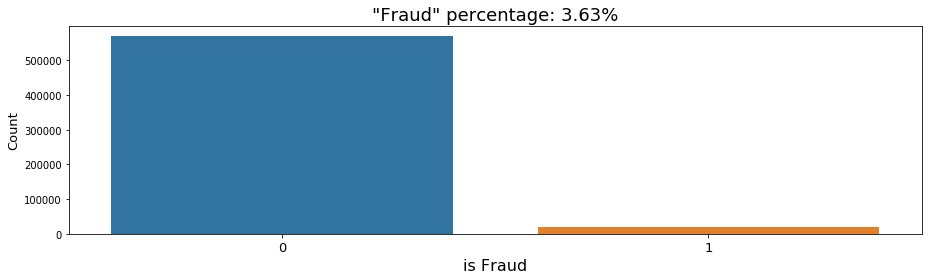

In [40]:
percent_fraud = f'{round(100 * isFraud.count() / noFraud.count(),2)}%'

plt.figure(figsize=(13, 4))
ax = sns.countplot(x='isFraud', data=train_data)
    
plt.xticks(fontsize=13)
plt.xlabel('is Fraud', fontsize=16)
plt.ylabel('Count', fontsize=13)
plt.title(f'"Fraud" percentage: {percent_fraud}', fontsize=18)
plt.tight_layout()

plt.show()

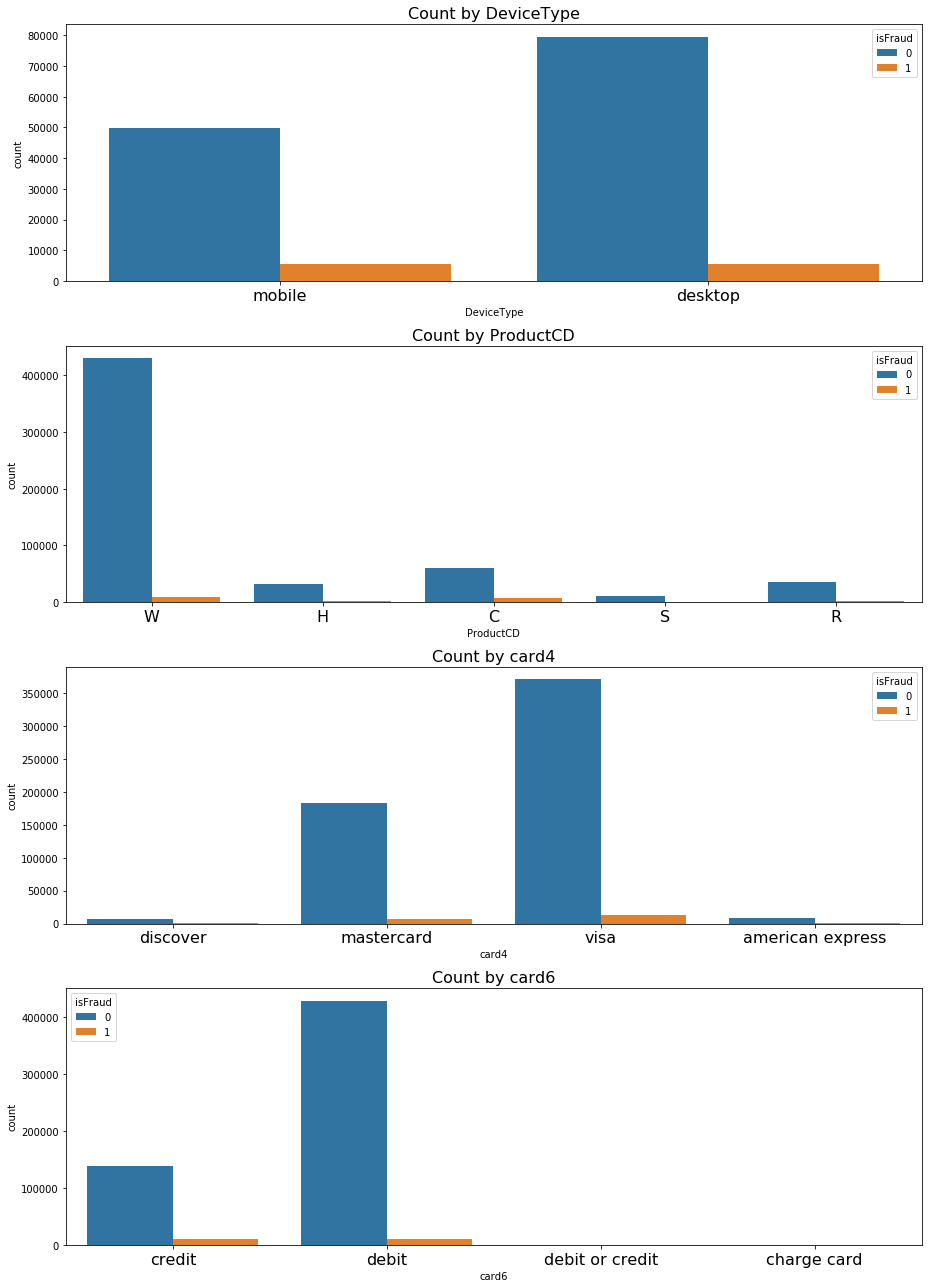

In [41]:
cols = ['DeviceType', 'ProductCD', 'card4', 'card6']
plt.figure(figsize=(13, 18))
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    sns.countplot(x=col,  hue='isFraud', data=train_data)
    plt.title('Count by '+str(col), fontsize=16)
    plt.xticks(fontsize=16)
    plt.tight_layout()

### LABEL ENCODING

TRANSACTION ID and TRANSACTION Amount

In [42]:
Xi['TransactionID'] = LabelEncoder().fit_transform(Xi['TransactionID'])
[Xi['TransactionID'].unique()]

[array([      0,       1,       2, ..., 1097228, 1097229, 1097230])]

TRANSACTION DT
Create new columns for 
- Number of years and week number for annual trends, _i.e. Xmas, Chinese New, Black Friday etc..._
- Day of week to distinquish between workday and non-workday trends
- Hourly trends, _i.e. most of the world would completed their working day during USA waking hours_

In [43]:
Xi['DT_YY'] = np.floor(X['TransactionDT']/3600/24/365).astype('int8')       # Year 1,2
Xi['DT_WW'] = np.floor(X['TransactionDT']/3600/24%365%52).astype('int8')    # Week Number 1,2,3...
Xi['DT_DD'] = np.floor(X['TransactionDT']/3600%365).astype('int16')         # Day of the Year 1,2,3,-365,7
Xi['DT_WD'] = np.floor(X['TransactionDT']/3600%365%7).astype('int8')        # Day of the Week 1,2,3,4,5,6,7
Xi['DT_hh'] = np.floor(X['TransactionDT']/3600%24).astype('int8')           # hour of the day 1-24

# <center>Categorical Features</center>

EXPLORE transactions for year-on-year differences

In [44]:
df = Xi.groupby(['TransactionDT']).sum()
train = Xi.loc[Xi['Train'] == 1 ]
test = Xi.loc[Xi['Train'] == 0 ]

In [45]:
Xi.head(3)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_37,id_38,DeviceType,DeviceInfo,Train,DT_YY,DT_WW,DT_DD,DT_WD,DT_hh
0,0,86400,68.5,W,13926,361.914978,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,1,0,1,24,3,0
1,1,86401,29.0,W,2755,404.000000,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,1,0,1,24,3,0
2,2,86469,59.0,W,4663,490.000000,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,1,0,1,24,3,0


### Email Domains

In [46]:
email_domains = Xi['P_emaildomain'].unique()

In [47]:
email_providers.head(8)

,email,email_provider_original,email_provider,TLD_lg,TLD,country,code
0,gmail,google,google,gmail,gmail,Global,267
1,att.net,att,att,net,net,United States of America (USA),253
2,twc.com,spectrum,spectrum,com,com,Global,267
3,scranton.edu,other,universities,edu,edu,United States of America (USA),253
4,optonline.net,other,other-csp,net,net,United States of America (USA),253
5,hotmail.co.uk,microsoft,microsoft,co.uk,uk,United Kingdom (UK),251
6,comcast.net,other,comcast,net,net,United States of America (USA),253
7,yahoo.com.mx,yahoo,verizon,com.mx,mx,Mexico,153


In [48]:
dict = email_providers.set_index("email").to_dict()["email_provider"]
Xi['email_provider'] = Xi['P_emaildomain'].map(dict)

In [49]:
dict = email_providers.set_index("email").to_dict()["code"]
Xi['email_country_code'] = Xi['P_emaildomain'].map(dict)

In [50]:
dict = email_providers.set_index("email").to_dict()["email_provider"]
Xi['R_email_provider'] = Xi['R_emaildomain'].map(dict)
dict = email_providers.set_index("email").to_dict()["code"]
Xi['R_email_country_code'] = Xi['R_emaildomain'].map(dict)

In [51]:
Xi['R_email_provider'].unique() 

array([nan, 'google', 'microsoft', 'other', 'other-csp', 'att', 'comcast',
       'apple', 'verizon', 'centurylink', 'universities', 'spectrum',
       'softbank', 'yahoo'], dtype=object)

In [52]:
Xi['email_provider'].unique()

array([nan, 'google', 'microsoft', 'verizon', 'other', 'apple', 'comcast',
       'other-csp', 'yahoo', 'att', 'centurylink', 'spectrum', 'softbank',
       'universities'], dtype=object)

In [53]:
Xi['email_provider'] = Xi['email_provider'].fillna(value='other')
Xi['R_email_provider'] = Xi['R_email_provider'].fillna(value='other')

Xi['email_country_code'] = Xi['email_country_code'].fillna(value=267)
Xi['R_email_country_code'] = Xi['R_email_country_code'].fillna(value=267)

In [54]:
Xi['email_country_code'].unique(), Xi['R_email_country_code'].unique()

(array([267., 253., 153., 226.,  94.,  85., 251., 122.]),
 array([267., 253., 153., 226.,  94.,  85., 251., 122.]))

In [55]:
Xi.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,Train,DT_YY,DT_WW,DT_DD,DT_WD,DT_hh,email_provider,email_country_code,R_email_provider,R_email_country_code
0,0,86400,68.5,W,13926,361.914978,150.0,discover,142.0,credit,...,1,0,1,24,3,0,other,267.0,other,267.0
1,1,86401,29.0,W,2755,404.000000,150.0,mastercard,102.0,credit,...,1,0,1,24,3,0,google,267.0,other,267.0
2,2,86469,59.0,W,4663,490.000000,150.0,visa,166.0,debit,...,1,0,1,24,3,0,microsoft,267.0,other,267.0
3,3,86499,50.0,W,18132,567.000000,150.0,mastercard,117.0,debit,...,1,0,1,24,3,0,verizon,267.0,other,267.0
4,4,86506,50.0,H,4497,514.000000,150.0,mastercard,102.0,credit,...,1,0,1,24,3,0,google,267.0,other,267.0


In [56]:
sns.set_style('darkgrid')

In [57]:
def plot_feature(df, featureX, featureY):
    df = Xi[[featureX, featureY]]
    df = df.groupby([featureX]).sum().reset_index()
    df[featureY] = round(df[featureY]*10**-6,1)
    
    plt.figure(figsize=(13, 3))
    ax=sns.barplot(data=df, x=featureX, y=featureY)
    
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), 
                    (p.get_x() +0.35, p.get_height() * 1.012),
                   fontsize=16)
    
    plt.xticks(fontsize=13)
    plt.xlabel(str(featureX), fontsize=15)
    plt.ylabel('Transaction Amount ($USD)', fontsize=13)
    plt.title(f'Transaction Amount by Feature: {str(featureX)}"'
              , fontsize=17)

    return plt.show()

### Card 4 - Feature Engineering

STRATEGY: partially helps to reduce one-hot encoding
1. Set NAN to other_cards
2. Group other, american express and discovers, as others

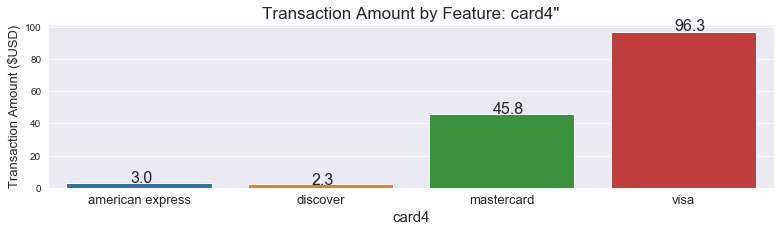

In [58]:
plot_feature(Xi, 'card4', 'TransactionAmt')

In [59]:
Xi['card4'].replace({'NaN':'other_cards', 'nan':'other_cards',
                     'american express':'other_cards',
                     'discover':'other_cards' },inplace=True)


In [60]:
Xi['card4'].fillna("other_cards", inplace=True) 
[Xi['card4'].unique()]

[array(['other_cards', 'mastercard', 'visa'], dtype=object)]

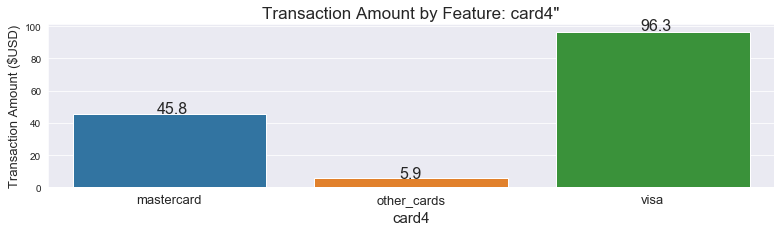

In [61]:
plot_feature(Xi, 'card4', 'TransactionAmt')

### Card 6 - Feature Engineering

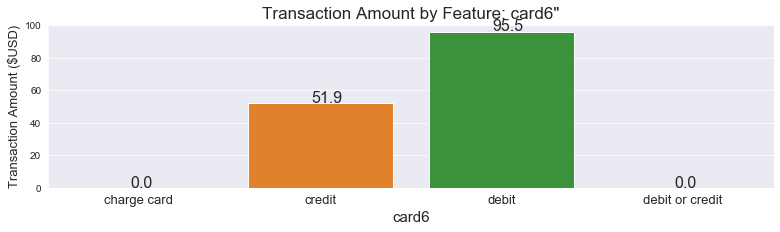

In [62]:
plot_feature(Xi, 'card6', 'TransactionAmt')

In [63]:
[Xi['card6'].unique()]

[[credit, debit, NaN, debit or credit, charge card]
 Categories (4, object): [credit, debit, debit or credit, charge card]]

In [64]:
Xi['card6'].replace({'NaN':'other_card_types', 'nan':'other_card_types',
                     'charge card':'other_card_types',
                     'debit or credit':'other_card_types' },inplace=True)
Xi['card6'].fillna("other_card_types", inplace=True) 
[Xi['card6'].unique()]

[array(['credit', 'debit', 'other_card_types'], dtype=object)]

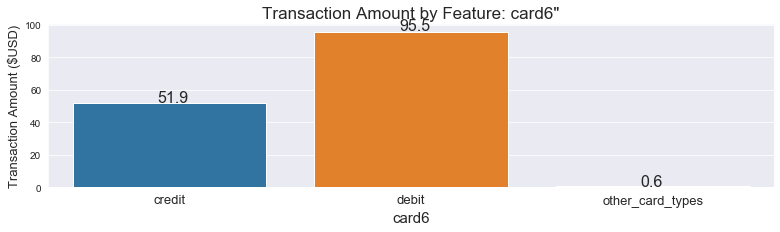

In [65]:
plot_feature(Xi, 'card6', 'TransactionAmt')

### Product CD - Feature Engineering

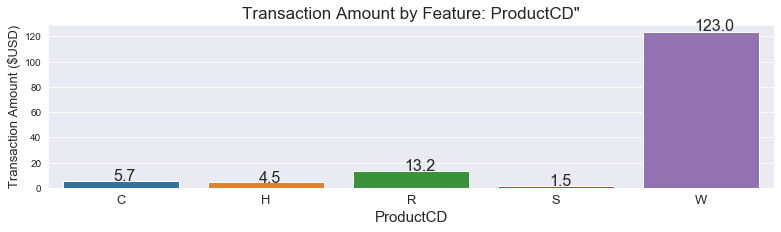

In [66]:
plot_feature(Xi, 'ProductCD', 'TransactionAmt')

In [67]:
[Xi['ProductCD'].unique()]

[[W, H, C, S, R]
 Categories (5, object): [W, H, C, S, R]]

GROUP C, H and S together

In [68]:
Xi['ProductCD'].replace({'NaN':'other_productCD', 'nan':'other_productCD',
                     'C':'other_productCD',
                     'H':'other_productCD',    
                     'S':'other_productCD' },inplace=True)
Xi['ProductCD'].fillna("other_productCD", inplace=True) 
[Xi['ProductCD'].unique()]

[array(['W', 'other_productCD', 'R'], dtype=object)]

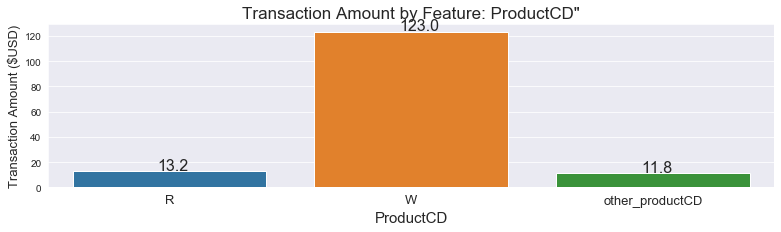

In [69]:
plot_feature(Xi, 'ProductCD', 'TransactionAmt')

DROP columns:
- 'TransactionDT'
- 'P_emaildomain'
- 'R_emaildomain'

In [70]:
drop_list = ['TransactionDT', 'P_emaildomain', 'R_emaildomain']

In [71]:
Xi.drop(['TransactionDT', 'P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)

In [72]:
Xi = optimize_dataframe(Xi)

In [73]:
Xi.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097231 entries, 0 to 506690
Data columns (total 440 columns):
TransactionID           uint32
TransactionAmt          float32
ProductCD               category
card1                   uint16
card2                   float32
card3                   float32
card4                   category
card5                   float32
card6                   category
addr1                   float32
addr2                   float32
dist1                   float32
dist2                   float32
C1                      float32
C2                      float32
C3                      float32
C4                      float32
C5                      float32
C6                      float32
C7                      float32
C8                      float32
C9                      float32
C10                     float32
C11                     float32
C12                     float32
C13                     float32
C14                     float32
D1                    

In [74]:
categorical_features = Xi.select_dtypes(include=['category']).columns

In [75]:
Xi_columns = np.array(Xi.columns).flatten()
categorical_feature_mask = []

for i in Xi_columns:
    if i in categorical_features:
        categorical_feature_mask.append(True)
    else:
        categorical_feature_mask.append(False)

In [76]:
Xi.head(3)

,TransactionID,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,Train,DT_YY,DT_WW,DT_DD,DT_WD,DT_hh,email_provider,email_country_code,R_email_provider,R_email_country_code
0,0,68.5,W,13926,361.914978,150.0,other_cards,142.0,credit,315.0,...,1,0,1,24,3,0,other,267.0,other,267.0
1,1,29.0,W,2755,404.000000,150.0,mastercard,102.0,credit,325.0,...,1,0,1,24,3,0,google,267.0,other,267.0
2,2,59.0,W,4663,490.000000,150.0,visa,166.0,debit,330.0,...,1,0,1,24,3,0,microsoft,267.0,other,267.0


In [77]:
le = LabelEncoder()

In [78]:
Xi = impute_n_reduce(Xi)

No Object columns to reassign!
original memory usage: 2.0 GB => new memory usage: 2.0 GB
new memory usage is 100.0% of the original memory allocation


In [79]:
Xi[categorical_features].head()

,ProductCD,card4,card6,M1,M2,M3,M4,M5,M6,M7,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,email_provider,R_email_provider
0,W,other_cards,credit,T,T,T,M2,F,T,F,...,1920x1080,match_status:2,T,F,T,F,desktop,Windows,other,other
1,W,mastercard,credit,T,T,T,M0,T,T,F,...,1920x1080,match_status:2,T,F,T,F,desktop,Windows,google,other
2,W,visa,debit,T,T,T,M0,F,F,F,...,1920x1080,match_status:2,T,F,T,F,desktop,Windows,microsoft,other
3,W,mastercard,debit,T,T,T,M0,T,F,F,...,1920x1080,match_status:2,T,F,T,F,desktop,Windows,verizon,other
4,other_productCD,mastercard,credit,T,T,T,M0,F,F,F,...,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,google,other


In [80]:
Xi[categorical_features] = Xi[categorical_features].apply(lambda col: le.fit_transform(col))

SPLIT "$X$" back into Kaggle format before One-Hot-Encoding

In [81]:
Xtrain = Xi.loc[Xi['Train'] == 1]
Xtest = Xi.loc[Xi['Train'] == 0]

In [82]:
del Xi

 ### One Encodings

In [83]:
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 

In [84]:
X_ohe = ohe.fit_transform(Xtrain)

/Users/conroybrown/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/conroybrown/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [85]:
Xtest_ohe = ohe.fit_transform(Xtest)

/Users/conroybrown/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/conroybrown/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


SPLIT "$X$" back into training and test datasets

In [86]:
X = Xtrain.merge(y, how='outer', left_index=True, right_index=True)

In [87]:
[X.shape, y.shape]

[(590540, 441), (590540, 1)]

In [88]:
X_corr = X.sample(n=100000).copy()
X_corr.shape

(100000, 441)

In [89]:
corrmat = X_corr.corr()
top_corr_features = corrmat.index[abs(corrmat['isFraud']) >= 0.10]

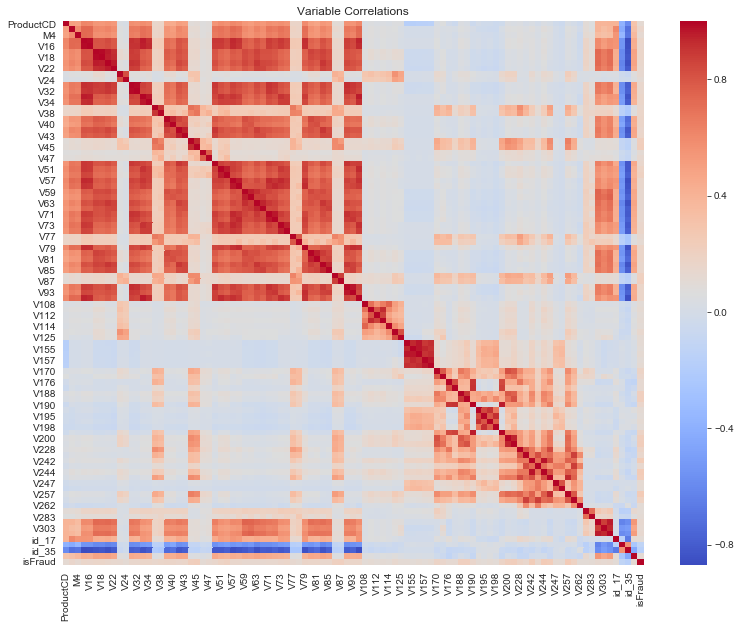

In [90]:
plt.figure(figsize=(13,10))
sns.heatmap(X_corr[top_corr_features].corr(), annot=False, cmap="coolwarm")
plt.title('Variable Correlations')
plt.show()

In [91]:
X_ohe.shape

(590540, 2743)

In [92]:
Xohe = pdf(X_ohe).merge(y, how='outer', left_index=True, right_index=True)

In [93]:
Xohe_corr = Xohe.sample(n=50000).copy()
Xohe_corr.shape

(50000, 2744)

In [94]:
corrmat_ohe = Xohe_corr.corr()
top_corr_features_ohe = corrmat_ohe.index[abs(corrmat_ohe['isFraud']) >= 0.1]

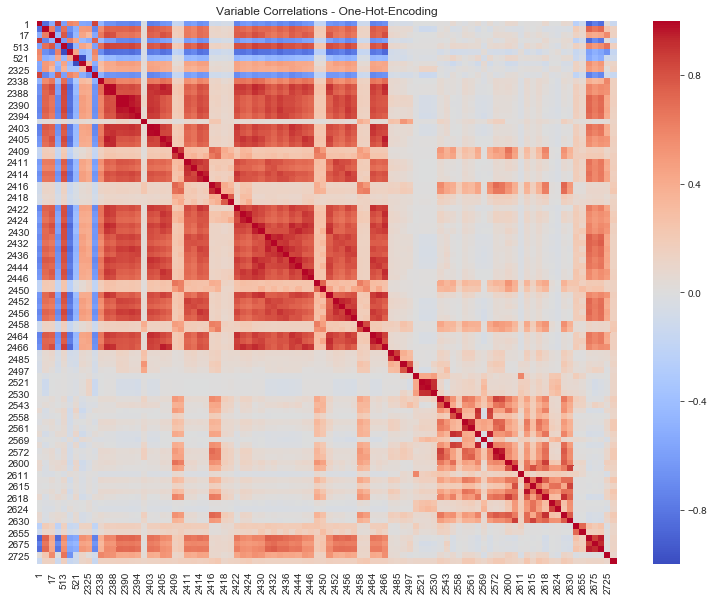

In [95]:
plt.figure(figsize=(13,10))
sns.heatmap(Xohe_corr[top_corr_features_ohe].corr(), annot=False, cmap="coolwarm")
plt.title('Variable Correlations - One-Hot-Encoding')
plt.show()

### MODEL - Logistic Regression

FUNCTION to splite X and y in train and test datasets

In [96]:
def predict_y(X, y):
    model = LogisticRegression(solver='lbfgs', max_iter=2584)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=34)

    X_train = np.array(X_train)
    X_test  = np.array(X_test)
    y_train = np.array(y_train).flatten()
    y_test  = np.array(y_test).flatten()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred, y_test

In [97]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    print('Confusion Matrix')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [98]:
def logistic_regression_model(X, y):
    y_test, y_pred = predict_y(X, y)  
    
    print(classification_report(y_test, y_pred))
    cnf_matrix=confusion_matrix(y_test,y_pred.round())
    plot_confusion_matrix(cnf_matrix,classes=[0,1])
    plt.show()

 #### Scaling and Normalization
 Exploration of the different techniques

In [99]:
def plot_heatmap(X, title):
    fig = plt.figure(figsize=(13, 5))
    
    ax0 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
    ax0 = sns.heatmap(X.sample(n=10000),  cmap='coolwarm')
    plt.title(title)
    plt.xlabel('features')
    plt.ylabel('data samples')
    
    ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=2)
    ax1 = sns.distplot(np.array(X).flatten(), color="blue")
    plt.title('Numerical Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency') 
    return plt.show()

In [100]:
def model_heatmap(X, title, model):
    np.array(X)
    X = model.fit_transform(X)
    plot_heatmap(pdf(X), title)
    return pdf(X)

#### MODEL INPUT - Dataset Scaling and Normalization

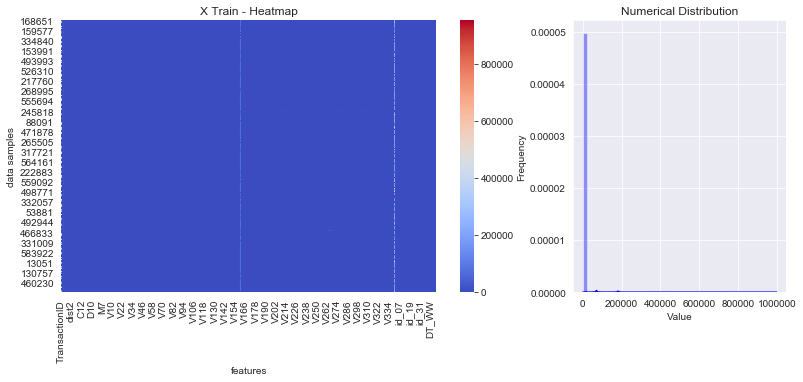

In [101]:
plot_heatmap(Xtrain, "X Train - Heatmap")

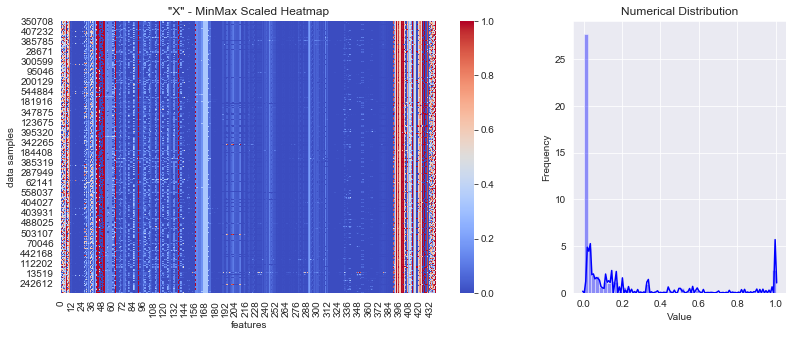

In [102]:
X_minmax = model_heatmap(Xtrain, '"X" - MinMax Scaled Heatmap', MinMaxScaler())

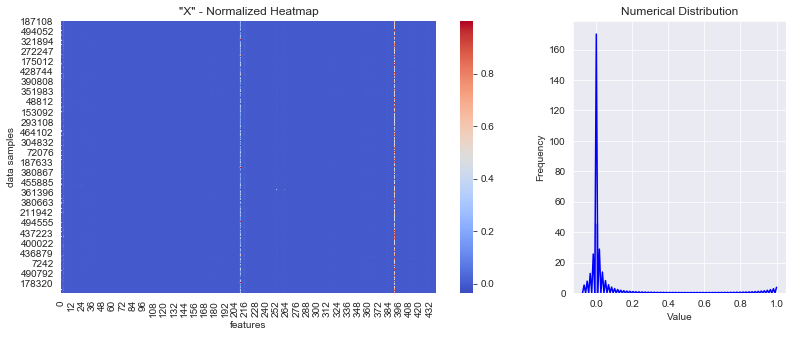

In [103]:
X_normal = model_heatmap(Xtrain, '"X" - Normalized Heatmap', Normalizer())

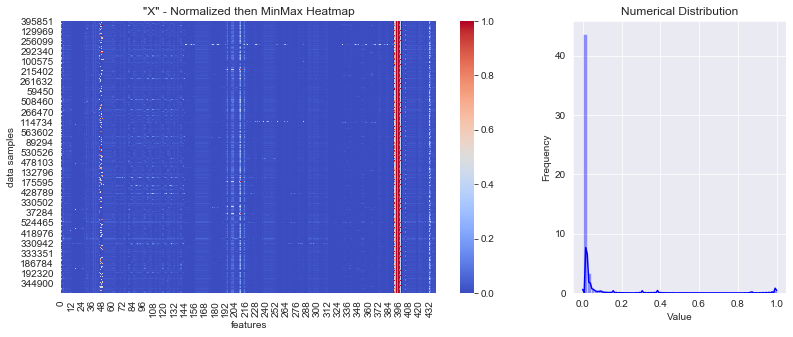

In [104]:
X_nMinMax = model_heatmap(X_normal, '"X" - Normalized then MinMax Heatmap', 
                          MinMaxScaler())

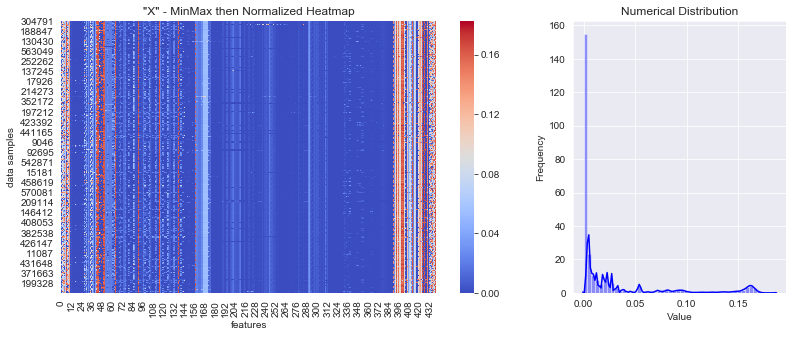

In [105]:
X_mmNormal = model_heatmap(X_minmax, '"X" - MinMax then Normalized Heatmap', 
                          Normalizer())

In [ ]:
X_ohe_mm = model_heatmap(X_ohe, '"X" - One-Hot_Encoded then MinMax Heatmap', 
                          MinMaxScaler())

#### MODEL OUTPUT - Confusion Matrix and Accuracy Scores

In [ ]:
logistic_regression_model(Xtrain, y)

In [ ]:
logistic_regression_model(X_minmax, y)

In [ ]:
logistic_regression_model(X_normal, y)

In [ ]:
logistic_regression_model(X_nMinMax, y)

In [ ]:
logistic_regression_model(X_mmNormal, y)

In [ ]:
logistic_regression_model(X_ohe_mm, y)

In [ ]:
X_scaler_normal_dataset = [X_minmax, X_normal, X_nMinMax, X_mmNormal ]
X_train_ohe_dataset = [X_ohe_mm, Xtrain, X_ohe]

pickle_save(X_scaler_normal_dataset, 'X_scaler_norm_data')
pickle_save(X_scaler_normal_dataset, 'X_train_ohe_data')

In [ ]:
del X_normal, X_nMinMax, X_mmNormal, Xtrain
del X_scaler_normal_dataset, X_train_ohe_dataset

### MODEL - Neural Network using SMOTE
Takes the entire dataset and increases the percentage minority cases, _i.e. cases when "$is$ $Fraud$" is $True$.

credit: [Fraud Detection with SMOTE](https://www.kaggle.com/sid321axn/fraud-detection-deep-learning-with-smote)

In [ ]:
import keras 
from keras.models import Sequential, model_from_json
from keras.layers import Dropout
from keras.layers import Dense

from imblearn.over_sampling import SMOTE

#### Baseline LOGISTIC REGRESSION model with SMOTE

In [ ]:
X_resample,y_resample=SMOTE().fit_sample(X_minmax,y.values.ravel())

In [ ]:
logistic_regression_model(X_resample, y_resample)

#### Baseline NEURAL NETWORK model with SMOTE

In [ ]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=0)

In [ ]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
resample = [X_resample, y_resample]
pickle_save(resample, 'smote_resample_data')

In [ ]:
del X_minmax, X_ohe, X_resample, y_resample, y_expected, resample

In [ ]:
model = Sequential([
     #First Layer
     Dense(units=34, input_dim=440, activation='relu'),
      #Second Layer
     Dense(units=34,activation='relu'),
     Dropout(0.5),
      #Third Layer
     Dense(21,activation='relu'),
     #Fourth Layer
     Dense(21,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid')   
])

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=21, epochs=8)

In [ ]:
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)
print(classification_report(y_test, y_pred.round()))
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

### SAVE model to disk

FUNCTION to save Keras Models

In [ ]:
def save_keras_model(model, filename):
    model_json = model.to_json()
    with open(f'model/{filename}.json', 'w') as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f'model/{filename}.h5')
    print(f'Saved model files "{filename}.json" and "{filename}.h5" to disk')

SAVE basis fraud detection model

In [ ]:
save_keras_model(model, 'Basic_fraud_model')